# Clustering of grain species by their geometrical properties

Abstract: Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

Data Set Information:

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.
The data set can be used for the tasks of classification and cluster analysis.

Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.


source:https://archive.ics.uci.edu/ml/datasets/seeds#

In [1]:
# getting the necessary libraries..
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#fetch file path and display  in df
path=r"C:/Users/val-c/seeds_dataset.txt"
cols=['area',' perimeter ','compactness','length of kernel', 'width of kernel',' asymmetry coefficient', 'length of kernel groove','variety']
wheat_var=pd.read_csv(path,delimiter= '\s+', index_col=False,names=cols)
wheat_var.head(n=6)

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [3]:
#rows and columns display
wheat_var.shape

(210, 8)

In [4]:
#info of df
wheat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1    perimeter               210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5    asymmetry coefficient   210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   variety                  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
#checking for missing values in the dataset
wheat_var.isna().sum()

area                       0
 perimeter                 0
compactness                0
length of kernel           0
width of kernel            0
 asymmetry coefficient     0
length of kernel groove    0
variety                    0
dtype: int64

In [6]:
#statistics of df
wheat_var.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
length of kernel,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
width of kernel,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetry coefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
length of kernel groove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500
variety,210.0,2.000000,0.818448,1.0000,1.00000,2.00000,3.000000,3.0000


In [7]:
# feature extraction for length of kernel index[3],width of kernel for index[4] for all the rows
feat_x=wheat_var.iloc[:,[3,4]].values
#print(feat_x)

In [8]:
import warnings
warnings.filterwarnings('ignore')

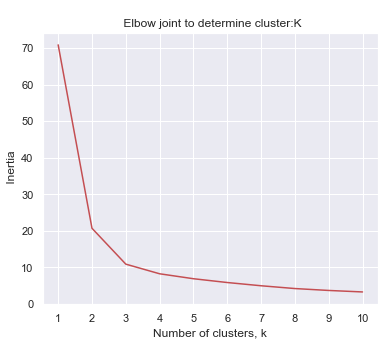

In [9]:
#cluster determination by elbow method
ks = range(1, 11)

inertias = [] #create empty list

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k,init='k-means++', random_state=42)
    
    # Fit model to samples
    model.fit(feat_x)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(6, 5)) #fig_sizing
sns.set()
plt.plot(ks, inertias, c='r') #'-*'
plt.title('\n Elbow joint to determine cluster:K')
plt.xlabel('Number of clusters, k')
plt.ylabel(' Inertia')
plt.xticks(ks)
plt.show() #display plot

In [10]:
#number of clusters detected=3
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(feat_x)
# Create a DataFrame with clusters and varieties as columns: df
varietys=wheat_var.variety
df = pd.DataFrame({'labels': labels, 'varieties': varietys})

# Create crosstab: ct
cros_tab = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print('\n')
print(labels)
print('\n')
cros_tab



[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 1 2 2 2 2 2 2
 2 2 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 2 1 0 0 0 0
 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 0 0 2 2 2 2 0 2 2 2 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]




varieties,1,2,3
labels,,,
0,1,56,0
1,18,0,69
2,51,14,1


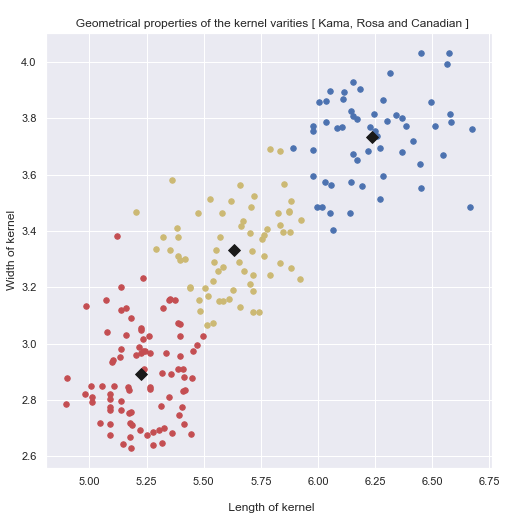

In [11]:
#plot the scatter
plt.figure(figsize=(8, 8))
plt.scatter( feat_x[labels==0,0], feat_x[labels==0,1], s=30, c='b') #scatter plot
plt.scatter( feat_x[labels==1,0], feat_x[labels==1,1], s=30, c='r')
plt.scatter( feat_x[labels==2,0], feat_x[labels==2,1], s=30, c='y')

#plot centriod
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s=70, c='k',marker='D') #plot centriod
plt.title ('\n  Geometrical properties of the kernel varities [ Kama, Rosa and Canadian ]')
plt.xlabel ('\n Length of kernel')
plt.ylabel ('Width of kernel')
plt.show() #display